<a href="https://colab.research.google.com/github/Alphaxfst/SimpleFaceRecognition/blob/main/Simple_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dlib
!pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=299a51802a38fd28f4c66d19aac90eb8db1a66b5fb7a93b164374937592593c3
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display
from io import BytesIO
import requests

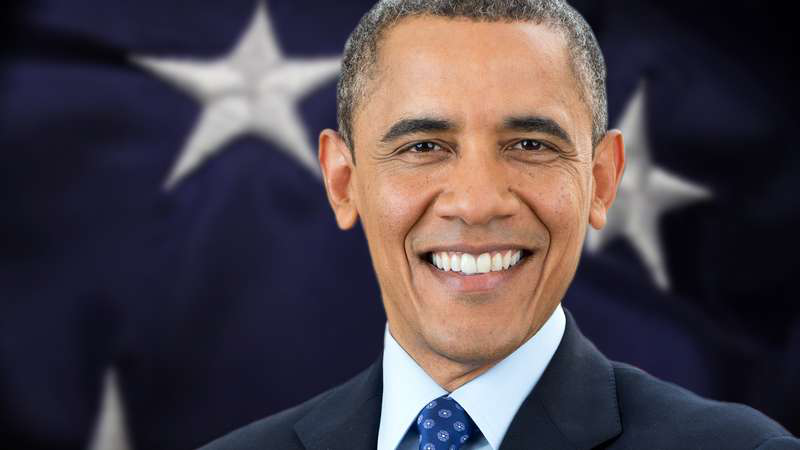

In [ ]:
response = requests.get('https://cdn.britannica.com/s:800x450,c:crop/43/172743-138-545C299D/overview-Barack-Obama.jpg')
img = Image.open(BytesIO(response.content))
img

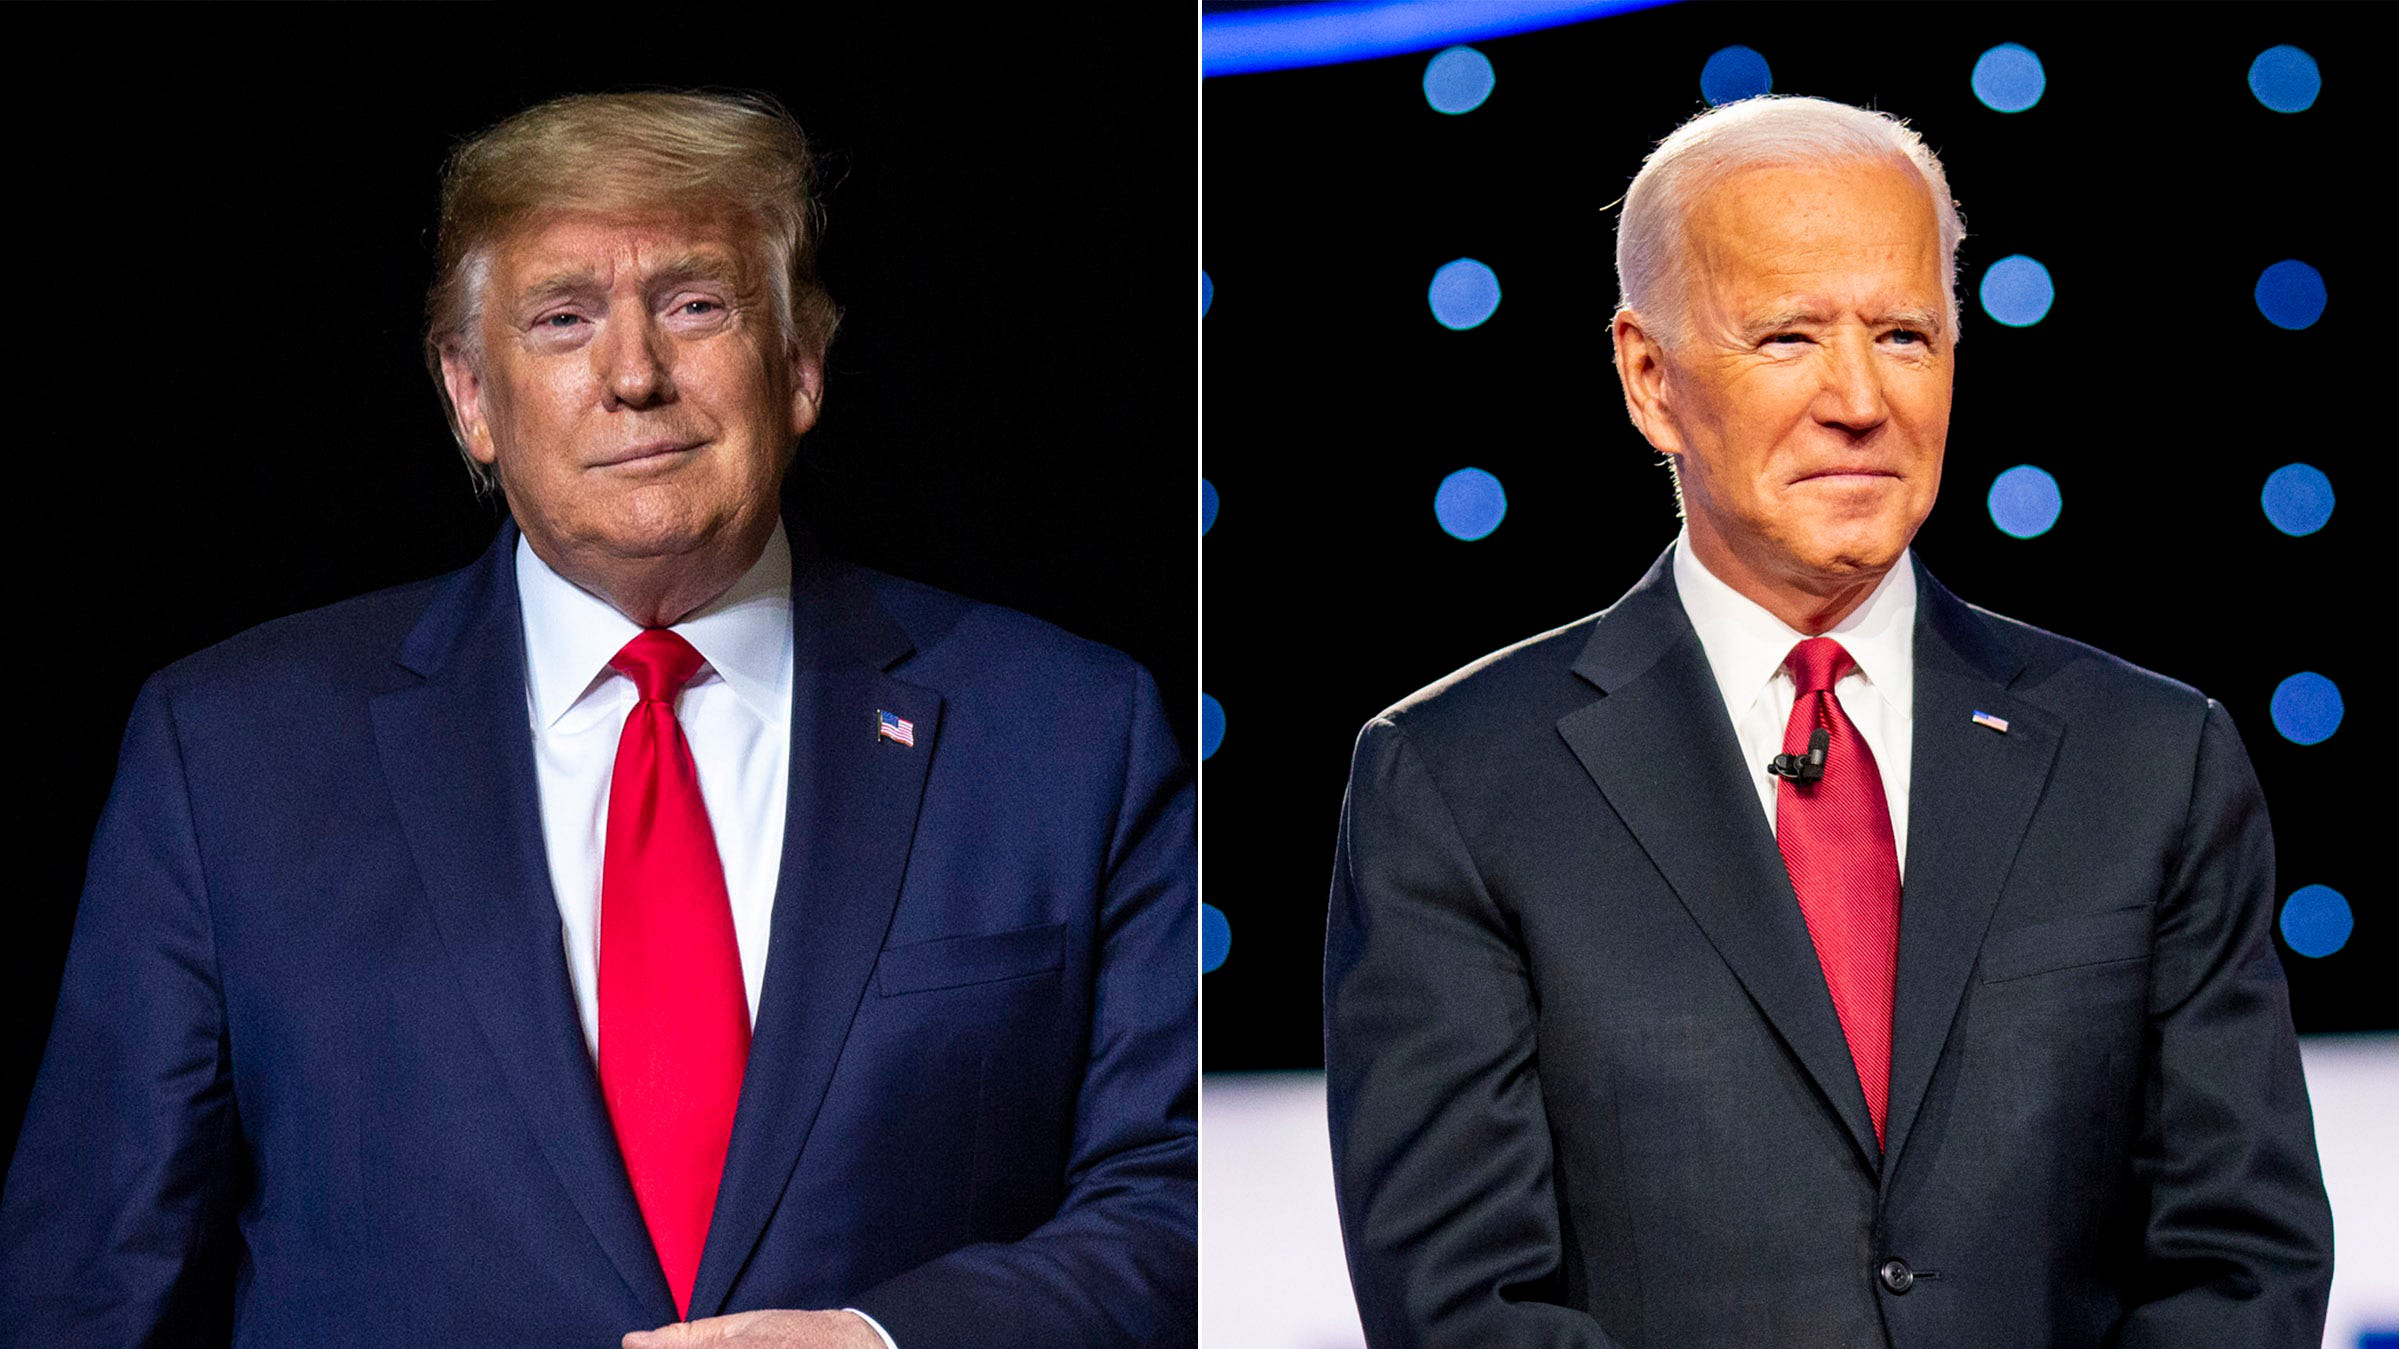

In [ ]:
pil_im = Image.open('1.jpg')
display(pil_im)

In [ ]:
#Fase Training
import face_recognition
import numpy as np

gambar_trump = face_recognition.load_image_file("2.jpg")
gambar_trump_encode = face_recognition.face_encodings(gambar_trump)[0]

gambar_biden = face_recognition.load_image_file("4.jpg")
gambar_biden_encode = face_recognition.face_encodings(gambar_biden)[0]

gambar_obama = face_recognition.load_image_file(BytesIO(response.content))
gambar_obama_encode = face_recognition.face_encodings(gambar_obama)[0]

face_encoding_kenal = [
                       gambar_trump_encode,
                       gambar_biden_encode,
                       gambar_obama_encode
]
nama_wajah_kenal = [
                    "Donald Trump",
                    "Joe Biden",
                    "Barrack Obama"
]

print('Mesin sudah mengenali ', len(face_encoding_kenal), 'images.')

Mesin sudah mengenali  3 images.


In [ ]:
#fase deteksi / klasifikasi
response = requests.get('https://d1e00ek4ebabms.cloudfront.net/production/d5916bba-cb59-4870-b867-854888d06d50.jpg')
unknown_image = face_recognition.load_image_file(BytesIO(response.content))

#mencari semua wajah yang ada di gambar dam gambar encoding
lokasi_wajah = face_recognition.face_locations(unknown_image)
encoding_wajah = face_recognition.face_encodings(unknown_image, lokasi_wajah)


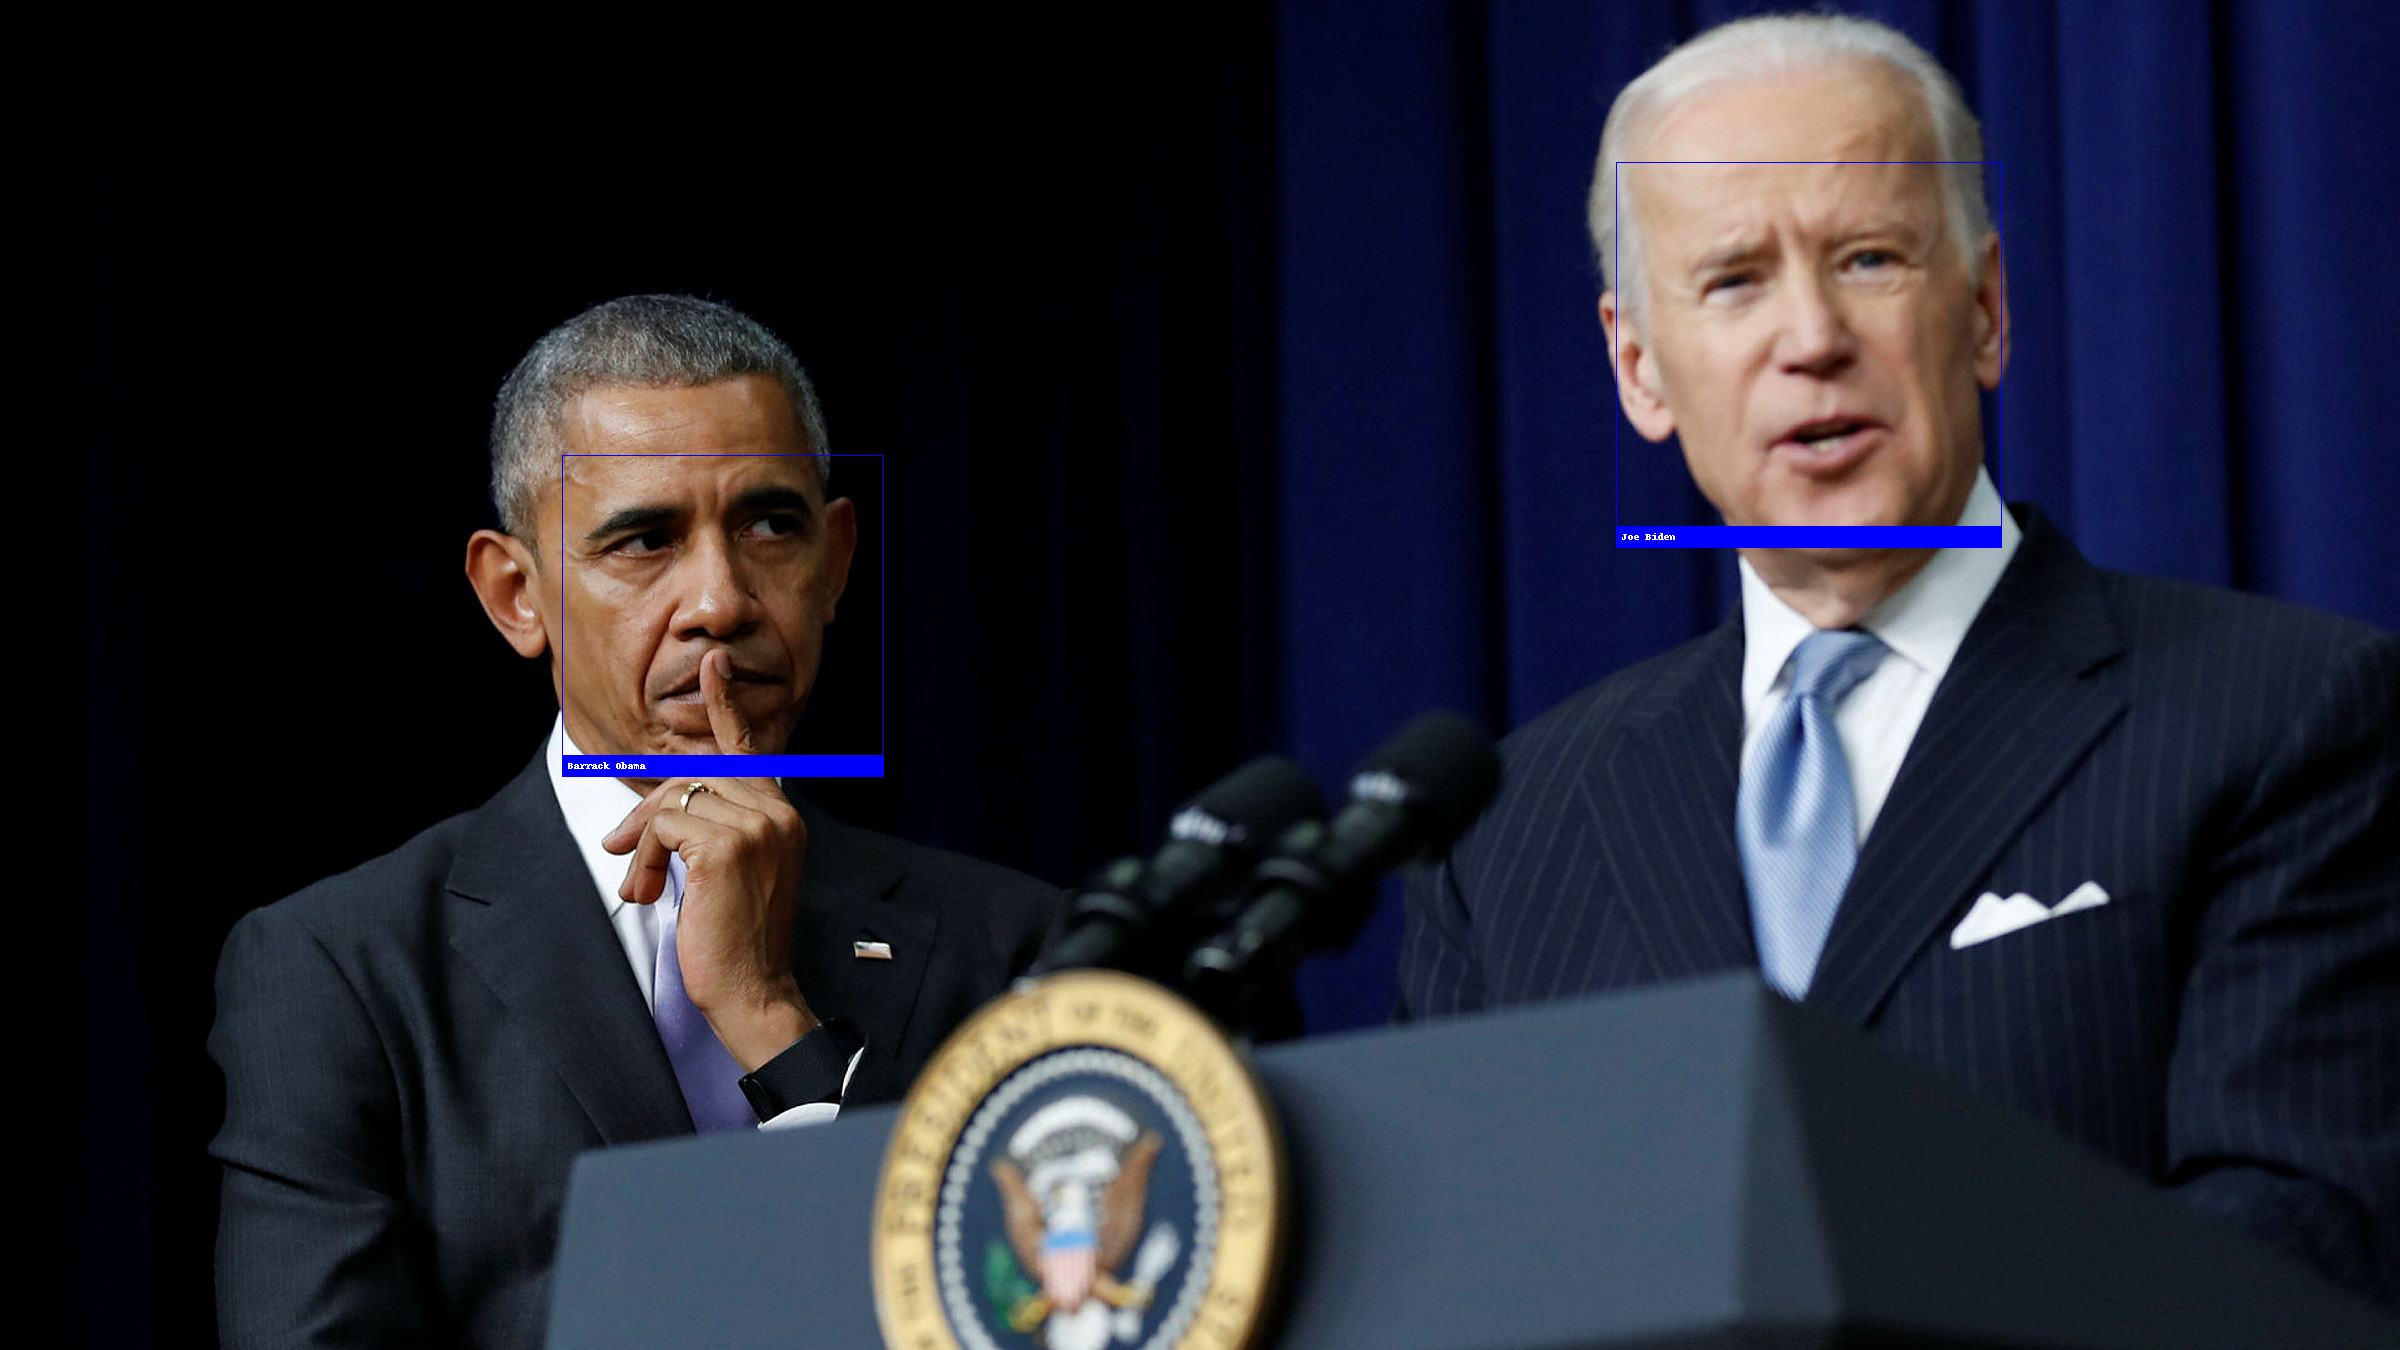

In [ ]:
#merubah dari image ke array
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

#looping n-wajah yang terdapat di dalam foto
for (top, right, bottom, left), encoding_wjh in zip(lokasi_wajah, encoding_wajah):
  matches = face_recognition.compare_faces(face_encoding_kenal, encoding_wjh)

  #sistem tidak dikenal
  name = "Tidak Diketahui"

  #Apakah dia mirip dengan encoding training distance
  face_distances = face_recognition.face_distance(face_encoding_kenal, encoding_wjh)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = nama_wajah_kenal[best_match_index]

  #memberikan tinggi dan lebar font yang akan dicetak
  text_width, text_height = draw.textsize(name)

  draw.rectangle(((left, top), (right, bottom)), outline=(0,0,255))
  
  #draw ke wajah di dalam foto
  draw.rectangle(((left, bottom - text_height-10), (right, bottom)), fill=(0,0,255), outline = (0,0,255))
  draw.text((left+6, bottom - text_height-5), name, fill=(255,255,255,255))

del draw

display(pil_image)
